# Insurance Customer Response Prediction

### Imports

In [82]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve, auc,roc_auc_score,confusion_matrix,classification_report,RocCurveDisplay,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [48]:
df = pd.read_csv("data.csv")

### Basic info and missing values

In [49]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [50]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [51]:
df.shape

(381109, 12)

In [52]:
df.size

4573308

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [54]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [55]:
df["Response"].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [56]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [57]:
target = "Response"

###  1) Histograms for numeric columns

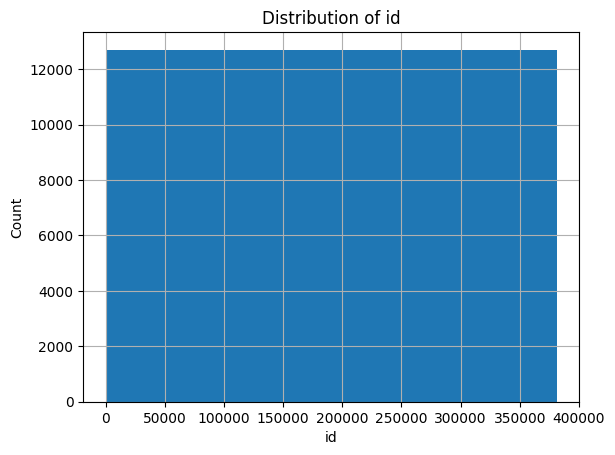

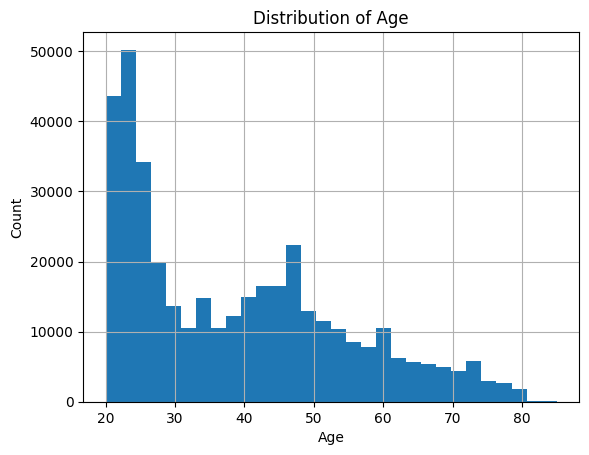

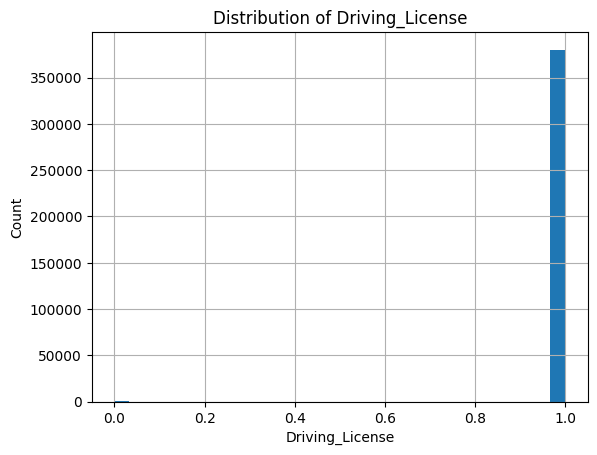

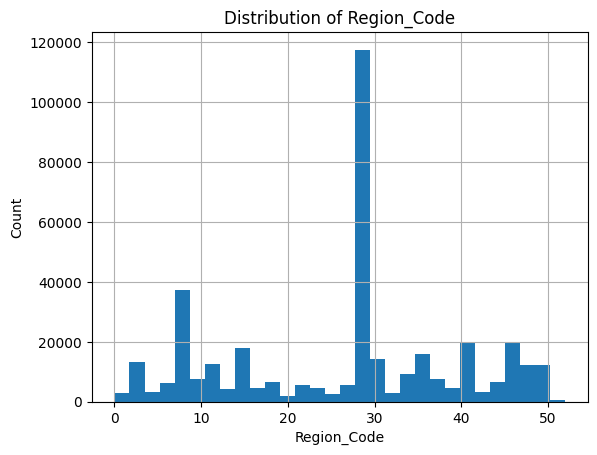

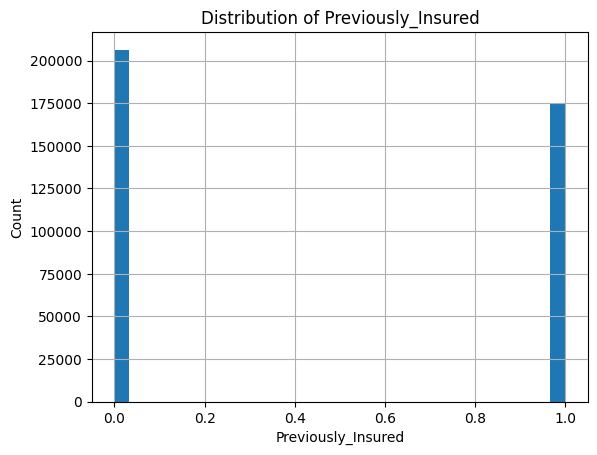

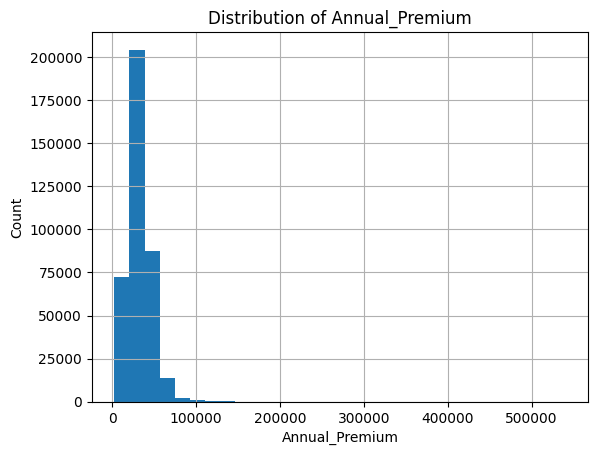

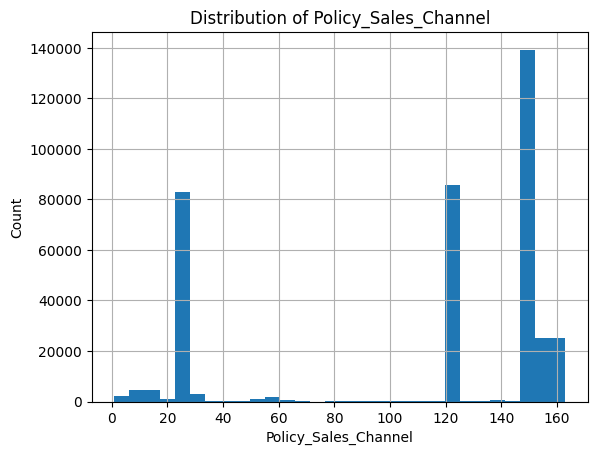

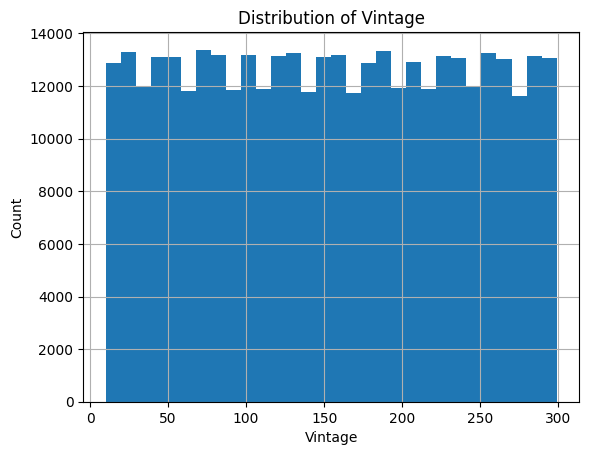

In [58]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols.remove(target)  # exclude target

for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### 2) Bar plots for categorical columns vs Response

<Figure size 640x480 with 0 Axes>

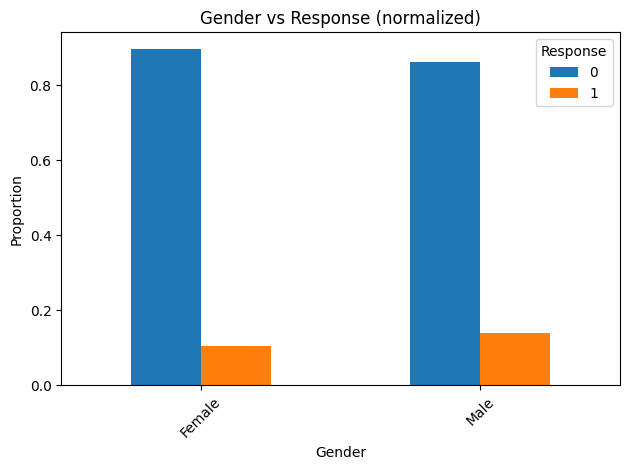

<Figure size 640x480 with 0 Axes>

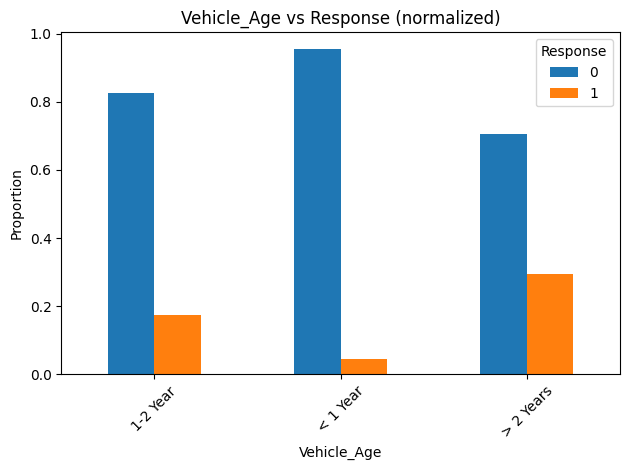

<Figure size 640x480 with 0 Axes>

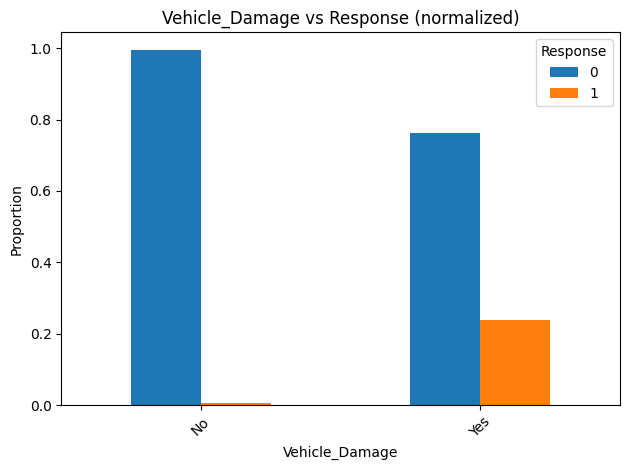

In [59]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

for col in categorical_cols:
    plt.figure()
    cross_tab = pd.crosstab(df[col], df[target], normalize="index")  # % by category
    cross_tab.plot(kind="bar")
    plt.title(f"{col} vs Response (normalized)")
    plt.ylabel("Proportion")
    plt.legend(title="Response")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3) Correlation heatmap for numeric features

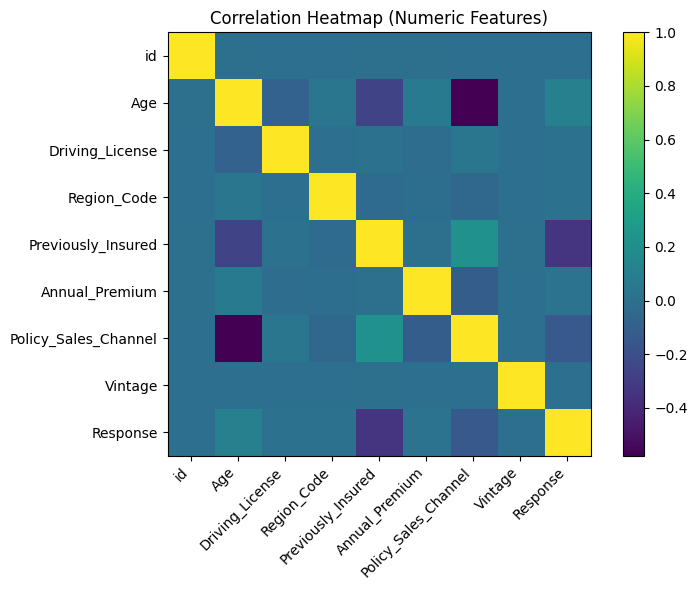

In [60]:
plt.figure(figsize=(8, 6))
corr = df[numeric_cols + [target]].corr()
im = plt.imshow(corr, interpolation="nearest")
plt.colorbar(im)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

### Feature engineering

In [61]:
df["Age_Bin"] = pd.cut(df["Age"],bins=[0, 30, 40, 50, 60, 120],labels=["<30", "30-40", "40-50", "50-60", "60+"])

In [62]:
df["Age_DL_Interaction"] = df["Age"] * df["Driving_License"]

In [63]:
df[["Age", "Driving_License", "Age_Bin", "Age_DL_Interaction"]].head()

,Age,Driving_License,Age_Bin,Age_DL_Interaction
0,44,1,40-50,44
1,76,1,60+,76
2,47,1,40-50,47
3,21,1,<30,21
4,29,1,<30,29


### Train/test split

In [18]:
X = df.drop(columns=[target])
y = df[target]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))

X_train shape: (304887, 13)
X_test shape: (76222, 13)
y_train distribution:
 Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


### Preprocessing

In [21]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

In [22]:
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Age_DL_Interaction']
Categorical features: ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [23]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())])

In [24]:
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("encoder", OneHotEncoder(handle_unknown="ignore"))])

In [25]:
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),("cat", categorical_transformer, categorical_features)])

### Helper function for model evaluation

In [26]:
def evaluate_model(name, model, X_test, y_test, results_list):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        y_proba = None
        roc_auc = np.nan
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    if y_proba is not None:
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f"ROC Curve - {name}")
        plt.show()
    
    results_list.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

### Logistic Regression + SMOTE + RandomizedSearchCV

In [77]:
log_reg_pipeline = ImbPipeline(steps=[("preprocessor", preprocessor),("smote", SMOTE(random_state=42)),("model", LogisticRegression(max_iter=1000))])

In [78]:
param_dist_logreg = {"model__C": np.logspace(-3, 3, 10),"model__penalty": ["l2"],"model__solver": ["lbfgs", "liblinear"]}

In [79]:
log_reg_search = RandomizedSearchCV(estimator=log_reg_pipeline,param_distributions=param_dist_logreg,n_iter=15,scoring="roc_auc",cv=5,verbose=1,n_jobs=-1,random_state=42)

In [30]:
log_reg_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


  File "C:\Users\Pratham Vernekar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Pratham Vernekar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pratham Vernekar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\User

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['id',
                                                                                'Age',
                                                                                'Driving_License',
                                                                                'Region_Code',
                                                                                'Previously_Insured',
                                                                                'Annual_Premium',
                                                                                'Policy_Sales_Channel',
                                                                                'Vintage',
                                                                                'Age_DL_Interaction']),
                                                                              ('cat',
                                                                               Pipeline(...
                                              LogisticRegression(max_iter=1000))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'model__C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'model__penalty': ['l2'],
                                        'model__solver': ['lbfgs',
                                                          'liblinear']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [31]:
print("Best params (Logistic Regression):", log_reg_search.best_params_)
best_log_reg = log_reg_search.best_estimator_

Best params (Logistic Regression): {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': np.float64(0.001)}


In [32]:
y_pred = best_log_reg.predict(X_test)
y_proba = best_log_reg.predict_proba(X_test)[:, 1]

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy Score: 0.6406549290231167

Confusion Matrix:
 [[39723 27157]
 [  233  9109]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



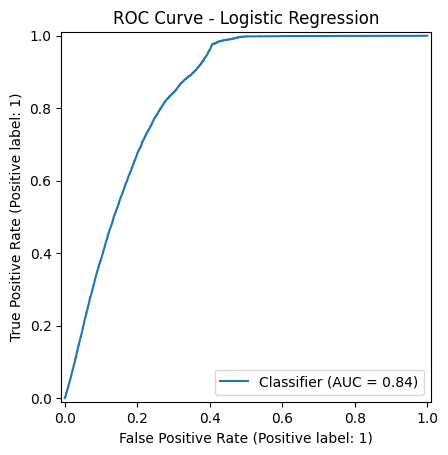

ROC-AUC Score: 0.8384868837190482


In [33]:
y_proba = best_log_reg.predict_proba(X_test)[:, 1]

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Logistic Regression")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

### Decision Tree + SMOTE + RandomizedSearchCV

In [34]:
dt_pipeline = ImbPipeline(steps=[("preprocessor", preprocessor),("smote", SMOTE(random_state=42)),("model", DecisionTreeClassifier(random_state=42))])

In [35]:
param_dist_dt = {"model__max_depth": [3, 5, 8, 10, 15, None],"model__min_samples_split": [2, 5, 10, 20],"model__min_samples_leaf": [1, 2, 4, 10],"model__criterion": ["gini", "entropy"]}

In [36]:
dt_search = RandomizedSearchCV(estimator=dt_pipeline,param_distributions=param_dist_dt,n_iter=20,scoring="roc_auc",cv=5,verbose=1,n_jobs=-1,random_state=42)

In [37]:
dt_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['id',
                                                                                'Age',
                                                                                'Driving_License',
                                                                                'Region_Code',
                                                                                'Previously_Insured',
                                                                                'Annual_Premium',
                                                                                'Policy_Sales_Channel',
                                                                                'Vintage',
                                                                                'Age_DL_Interaction']),
                                                                              ('cat',
                                                                               Pipeline(...
                                                                                'Vehicle_Age',
                                                                                'Vehicle_Damage'])])),
                                             ('smote', SMOTE(random_state=42)),
                                             ('model',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [3, 5, 8, 10, 15,
                                                             None],
                                        'model__min_samples_leaf': [1, 2, 4,
                                                                    10],
                                        'model__min_samples_split': [2, 5, 10,
                                                                     20]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [38]:
print("Best params (Decision Tree):", dt_search.best_params_)
best_dt = dt_search.best_estimator_

Best params (Decision Tree): {'model__min_samples_split': 5, 'model__min_samples_leaf': 10, 'model__max_depth': 8, 'model__criterion': 'gini'}


In [39]:
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))



Accuracy Score: 0.7393534675028207

Confusion Matrix:
 [[48689 18191]
 [ 1676  7666]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83     66880
           1       0.30      0.82      0.44      9342

    accuracy                           0.74     76222
   macro avg       0.63      0.77      0.63     76222
weighted avg       0.88      0.74      0.78     76222



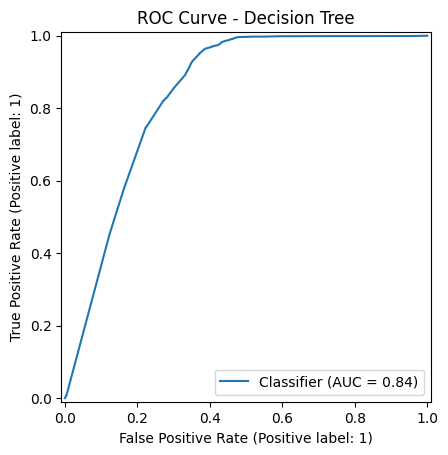

ROC-AUC Score: 0.8393096378678786


In [40]:
y_proba = best_dt.predict_proba(X_test)[:, 1]

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Decision Tree")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

### Random Forest + SMOTE + RandomizedSearchCV

In [41]:
rf_pipeline = ImbPipeline(steps=[("preprocessor", preprocessor),("smote", SMOTE(random_state=42)),("model", RandomForestClassifier(random_state=42))])

In [42]:
param_dist_rf = {"model__n_estimators": [100],"model__max_depth": [5, 10, 15, None],"model__min_samples_split": [2, 5, 10],"model__min_samples_leaf": [1, 2, 4],"model__max_features": ["sqrt", "log2", None]}

In [43]:
rf_search = RandomizedSearchCV(estimator=rf_pipeline,param_distributions=param_dist_rf,n_iter=5,scoring="roc_auc",cv=2,verbose=1,n_jobs=-1,random_state=42)

In [44]:
rf_search.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['id',
                                                                                'Age',
                                                                                'Driving_License',
                                                                                'Region_Code',
                                                                                'Previously_Insured',
                                                                                'Annual_Premium',
                                                                                'Policy_Sales_Channel',
                                                                                'Vintage',
                                                                                'Age_DL_Interaction']),
                                                                              ('cat',
                                                                               Pipeline(...
                                                                                'Vehicle_Damage'])])),
                                             ('smote', SMOTE(random_state=42)),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__max_depth': [5, 10, 15, None],
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [45]:
print("Best params (Random Forest):", rf_search.best_params_)
best_rf = rf_search.best_estimator_

Best params (Random Forest): {'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 15}


In [46]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy Score: 0.7417805882815985

Confusion Matrix:
 [[48698 18182]
 [ 1500  7842]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83     66880
           1       0.30      0.84      0.44      9342

    accuracy                           0.74     76222
   macro avg       0.64      0.78      0.64     76222
weighted avg       0.89      0.74      0.78     76222



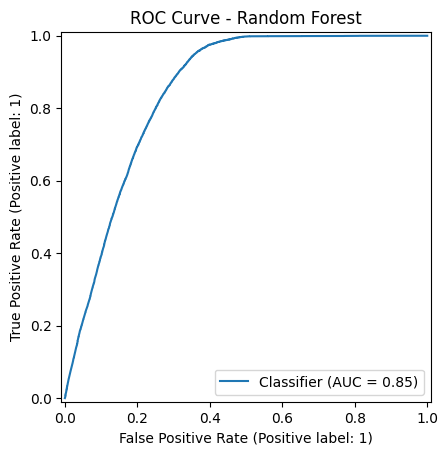

ROC-AUC Score: 0.8477905752971353


In [47]:
y_proba = best_rf.predict_proba(X_test)[:, 1]

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Random Forest")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

In [75]:
if not isinstance(X_train_enc, pd.DataFrame):
    X_train_enc = pd.DataFrame(X_train_enc)
if not isinstance(X_test_enc, pd.DataFrame):
    X_test_enc = pd.DataFrame(X_test_enc)

In [76]:
X_train_num = X_train_enc.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test_num  = X_test_enc.apply( pd.to_numeric, errors='coerce').fillna(0)

In [77]:
X_train_num, X_test_num = X_train_num.align(X_test_num, join='outer', axis=1, fill_value=0)
X_train_arr = X_train_num.to_numpy(dtype=np.float32)
X_test_arr  = X_test_num.to_numpy(dtype=np.float32)

In [78]:
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
scale_pos_weight = float(neg) / (pos + 1e-12)

In [79]:
# 3) Configure XGBoost
xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)

# 4) Fit the model using NumPy arrays
try:
    xgb_clf.fit(X_train_arr, y_train)
except Exception as e:
    # If there is still an error, attempt sanitizing column names and re-run on DataFrame
    print("NumPy fit failed — attempting sanitizing column names and retrying. Error:", str(e))
    import re
    def sanitize_columns(cols):
        new_cols = []
        for c in cols:
            s = str(c)
            s = re.sub(r'[^\w]', '_', s)
            s = re.sub(r'__+', '_', s).strip('_')
            if s == '':
                s = 'col'
            new_cols.append(s)
        seen = {}
        unique = []
        for name in new_cols:
            if name not in seen:
                seen[name] = 0
                unique.append(name)
            else:
                seen[name] += 1
                unique.append(f"{name}_{seen[name]}")
        return unique
    X_train_enc.columns = sanitize_columns(X_train_enc.columns)
    X_test_enc.columns  = sanitize_columns(X_test_enc.columns)
    X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='outer', axis=1, fill_value=0)
    X_train_arr = X_train_enc.astype(np.float32).to_numpy()
    X_test_arr  = X_test_enc.astype(np.float32).to_numpy()
    xgb_clf.fit(X_train_arr, y_train)

In [80]:
y_proba = xgb_clf.predict_proba(X_test_arr)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Test ROC AUC (XGBoost): {roc_auc:.4f}")

Test ROC AUC (XGBoost): 0.8578


In [83]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)

In [87]:
y_pred = xgb_clf.predict(X_test_arr)
y_proba = xgb_clf.predict_proba(X_test_arr)[:, 1]

In [88]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=2)
rocauc = roc_auc_score(y_test, y_proba)

In [89]:
print(f"Accuracy Score: {acc}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)
print(f"\nROC AUC: {rocauc:.4f}\n")

Accuracy Score: 0.7105428878801396

Confusion Matrix:
[[45570 21310]
 [  753  8589]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.81     66880
           1       0.29      0.92      0.44      9342

    accuracy                           0.71     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.71      0.76     76222


ROC AUC: 0.8578



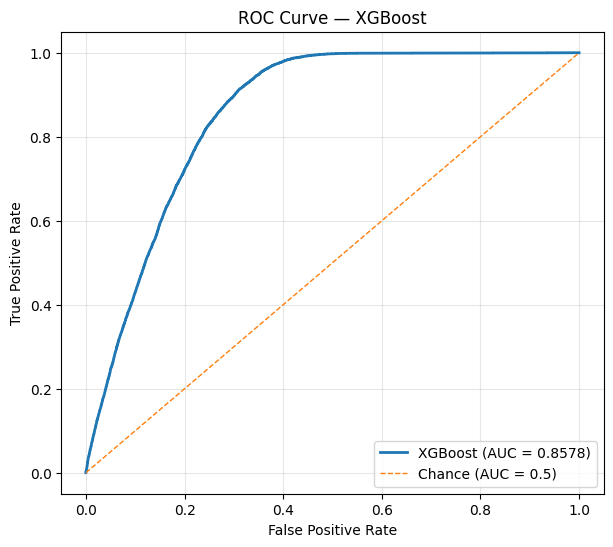

In [84]:
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_val:.4f})', linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', linewidth=1, label='Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — XGBoost')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Evaluate all models & comparison table


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Logistic Regression Confusion Matrix:
[[39723 27157]
 [  233  9109]]


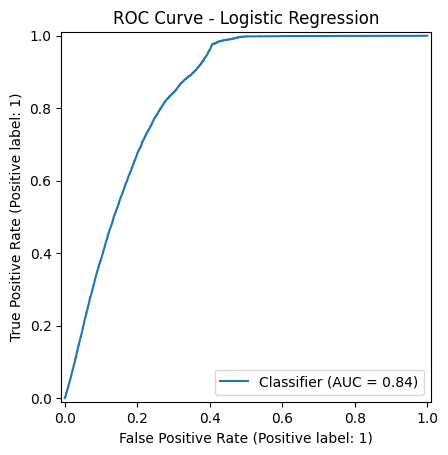


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     66880
           1       0.30      0.82      0.44      9342

    accuracy                           0.74     76222
   macro avg       0.63      0.77      0.63     76222
weighted avg       0.88      0.74      0.78     76222

Decision Tree Confusion Matrix:
[[48689 18191]
 [ 1676  7666]]


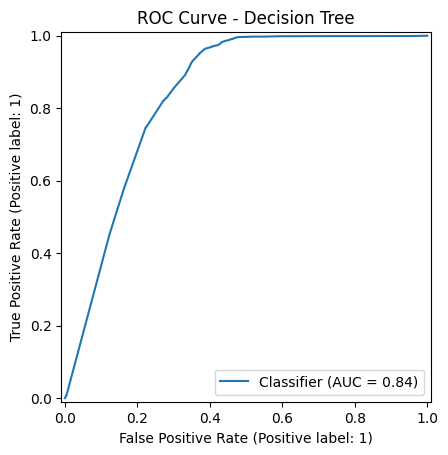


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     66880
           1       0.30      0.84      0.44      9342

    accuracy                           0.74     76222
   macro avg       0.64      0.78      0.64     76222
weighted avg       0.89      0.74      0.78     76222

Random Forest Confusion Matrix:
[[48698 18182]
 [ 1500  7842]]


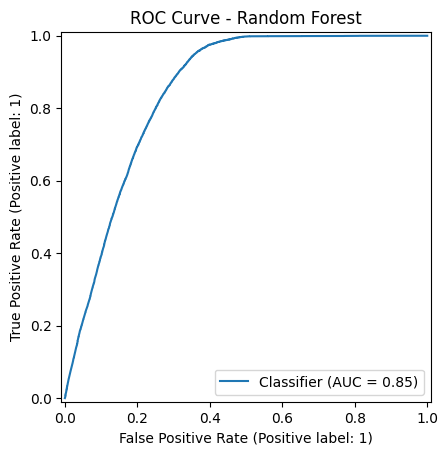


Model Comparison:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Logistic Regression,0.640655,0.251172,0.975059,0.399447,0.838487
Decision Tree,0.739353,0.296477,0.820595,0.435581,0.839310
Random Forest,0.741781,0.301337,0.839435,0.443477,0.847791


In [48]:
results = []

evaluate_model("Logistic Regression", best_log_reg, X_test, y_test, results)
evaluate_model("Decision Tree", best_dt, X_test, y_test, results)
evaluate_model("Random Forest", best_rf, X_test, y_test, results)

results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)

print("\nModel Comparison:")
results_df